In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [29]:
os.chdir('C:/Users/Matthew/Documents/Python_Data')
df = pd.read_csv('winequalityN.csv')

In [30]:
df = df.dropna(how='any',axis=0)

## Initial Exploration

In [31]:
#Initial Exploration
df.head()
df.info()
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Data Preprocessing/Prep

### Converting 'quality' to binary categorical var for classification

In [32]:
df["quality"] = pd.cut(df['quality'],bins=[2,6.5,10],labels=['Lower Quality', 'Higher Quality'])
df['quality'].unique()

[Lower Quality, Higher Quality]
Categories (2, object): [Lower Quality < Higher Quality]

In [33]:
# preprocessing quality variable
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'].astype(str))

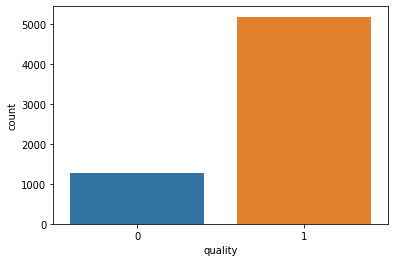

In [34]:
#checking out volume of each quality level
sns.countplot(df['quality'])

In [35]:
df['quality'].value_counts()

1    5192
0    1271
Name: quality, dtype: int64

### Converting 'type' to a numeric binary variable to allow Euclidian distance calc

In [36]:
df = pd.get_dummies(df, columns=['type'])

### Creating response and predictor arrays and splitting for train/test sets

In [37]:
# Create predictor and response arrays
y = df['quality']
X = df.drop(['quality'], axis='columns')

### Scale data to allow Euclidian Distance calc

In [38]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state= 42, stratify=y)

#standard scaling data for Euclidian distance calcs
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_Test = sc.fit_transform(X_test)

# KNN

### 81% overall accuracy, 60% TP 82% TN

#### TP = True Positive, TN  = True Negative

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

Text(0.5, 1.0, 'k-NN: Varying Number of Neighbors')

Text(0.5, 0, 'Number of Neighbors')

Text(0, 0.5, 'Accuracy')

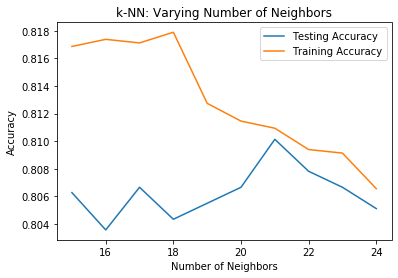

In [85]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(15, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [88]:
#Using KNN to to classify (w/ train:test split)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 21)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

#creating predictions
pred_knn = knn.predict(X_test)

# Print the accuracy
print(knn.score(X_test, y_test))
print(confusion_matrix(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

0.8101314771848415
[[  58  453]
 [  38 2037]]
              precision    recall  f1-score   support

           0       0.60      0.11      0.19       511
           1       0.82      0.98      0.89      2075

    accuracy                           0.81      2586
   macro avg       0.71      0.55      0.54      2586
weighted avg       0.78      0.81      0.75      2586



# Random Forest

### 88% overall accuracy, 78% TP 89% TN

#### TP = True Positive, TN  = True Negative

#### Best model by far, correctly predicts 78% of minority case (higher quality wine) and 89% of majority case (lower quality wine)

In [98]:
rfc = RandomForestClassifier(n_estimators = 2500)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[[ 267  244]
 [  73 2002]]
              precision    recall  f1-score   support

           0       0.79      0.52      0.63       511
           1       0.89      0.96      0.93      2075

    accuracy                           0.88      2586
   macro avg       0.84      0.74      0.78      2586
weighted avg       0.87      0.88      0.87      2586



# Logistic Regression

### 67% accuracy, 18% TP 80% TN

#### TP = True Positive, TN  = True Negative

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[[ 49 205]
 [227 812]]
              precision    recall  f1-score   support

           0       0.18      0.19      0.18       254
           1       0.80      0.78      0.79      1039

    accuracy                           0.67      1293
   macro avg       0.49      0.49      0.49      1293
weighted avg       0.68      0.67      0.67      1293



Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

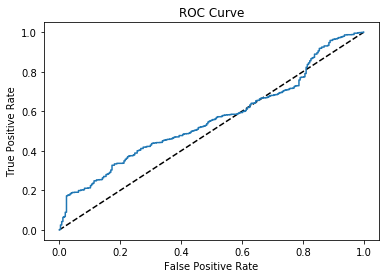

In [59]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Classication Tree

### 82% accuracy, 57% TP 86% TN)

#### TP = True Positive, TN  = True Negative

In [97]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3,4, 5,6, 7,8,9],
              "max_features": randint(1, 12),
              "min_samples_leaf": randint(1, 16),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

pred_tree = tree_cv.predict(X_test)
print(confusion_matrix(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

[[ 198  313]
 [ 151 1924]]
              precision    recall  f1-score   support

           0       0.57      0.39      0.46       511
           1       0.86      0.93      0.89      2075

    accuracy                           0.82      2586
   macro avg       0.71      0.66      0.68      2586
weighted avg       0.80      0.82      0.81      2586

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 11}
Best score is 0.8238347189890256
